# <center>Second Update on Group Project  
# <center>[Safe Trade: Stock Prediction](https://github.com/breindy/SafeTrade)
Shofiqur Rahman<br>
Bashir Ahamed<br>
Michelle Uy<br>
Thierno Diallo<br><br>
Grant Long<br>
CSC.59970<br>
November 19, 2018

With a lot of company stocks listed and a huge amount of trading done each working day we have an immense amoount of data at our hand. With that a problem comes is what we consider and what we discard as not necessary. Most importantly, what features do really impact stock prices. The first task is to come up with some features that effects stock prices. For that purpose, we will see correlation between stock price and each features we can find. The data will come from [IEX API](https://iextrading.com/developer/docs/)

Also with all the varieties of stock data at hand we realize that dealing with all the different company stocks together might not give us a woriking model for all company; a model appropriate to predict on one company stocks might not perform equally well on another company. So, initially our foucs is on to build a model that can predict well at least for a company, namely Apple Inc. or AAPL.

We also realize that pridicting an exact stock price depending on some regression model might be too bold. Instead, what we could do is to say, given the present state of the market, if the company stock price is going to rise or fall in near future (Probably, to be specific, in next three/four months). We might add to that by what percent the stock might rise. 

Another issue we face while building this prediction model is that the model needs to be fed some parameter values for it to predict a price for future date. But, the values for parameters is also a prediction in many cases which is to say that we do not have values for parameters/features for a future date. Therefore, the goal for now is to split the available data in X_test, y_test, X_train, and y_train. And then we will see the performance of the model on test (X_test, y_test) data. 

Also, since we aggregated and cleaned our data in the first update to StockData.csv, we will assume that we have our necessary data in StockData.csv unless we add more features here.

To add another feature to our arsenal, we consider stock exnhange index will be a strong candidate. Since stock prices tend to rise and fall in relation to exchange's index, we will see the correlation between a particular stock's price and the merket index. Though, we are fetching all other data from IEX exchange, the index will come from NASDAQ since IEX does not provide historical data of its index. We think this would not matter much on the prediction model since all other features like pe, dividends are the same across all stock exchanges. The stock exchange index data is coming from [here](https://finance.yahoo.com/quote/%5EIXIC/history?ltr=1). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AllStockData.csv')
# df['nasdaqIndex'] = ''
# # ^IXIC.csv retrieved from https://finance.yahoo.com/quote/%5EIXIC/history?ltr=1
# dfNasdaqIndices = pd.read_csv('NasdaqIndices.csv')

# for index, row in dfNasdaqIndices.iterrows():
#     df.loc[df['date'] == row['Date'], ['nasdaqIndex']] = row['Close']

# # Save all stock data in a CSV file called 'StockData.csv'
# df.to_csv('StockData.csv')

df.head()

,Unnamed: 0,date,company,symbol,dividend,eps,nasdaqIndex,numberOfShare,pe,price,profitPerShare,revenuePerShare
0,0,2017-11-28,Zoetis Inc. Class A,ZTS,0.105,0.76,NaN,5.963746e+08,70.9670,70.9670,5.144417,3
1,1,2017-11-29,Zoetis Inc. Class A,ZTS,0.105,0.76,NaN,5.945424e+08,71.1857,71.1857,5.160271,3
2,2,2017-11-30,Zoetis Inc. Class A,ZTS,0.105,0.76,NaN,5.889504e+08,71.8616,71.8616,5.209267,3
3,3,2017-12-01,Zoetis Inc. Class A,ZTS,0.105,0.76,NaN,5.888685e+08,71.8716,71.8716,5.209992,3
4,4,2017-12-04,Zoetis Inc. Class A,ZTS,0.105,0.76,NaN,5.994824e+08,70.5991,70.5991,5.117748,3


In [2]:
# Replacing infinite values with NaN and then
# Cleaning out the null or nan values
df.replace([np.inf, -np.inf], np.nan)
df.dropna()
# Dropping the 'NaN' rows that is read as string
df = df[~df['nasdaqIndex'].isin(['NaN'])]

print(df.shape)
print(df.isna().sum())
df.isnull().values.any()

(534960, 12)
Unnamed: 0         0
date               0
company            0
symbol             0
dividend           0
eps                0
nasdaqIndex        0
numberOfShare      0
pe                 0
price              0
profitPerShare     0
revenuePerShare    0
dtype: int64


False

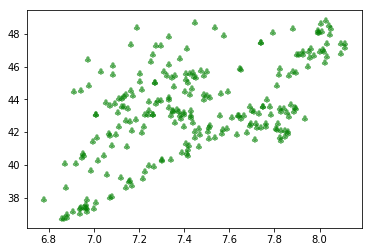

In [3]:
# Visualizig correlation between stock price and stock exchange index
singleDF = df.loc[df['symbol'] == 'CSCO']
try:
    plt.scatter(singleDF.nasdaqIndex, singleDF.price, alpha=0.5, marker=r'$\clubsuit$', color='green')
except ValueError as e:
    print(e)

plt.show()


In [4]:
### Divide the DataFrame in X(Features) and Y(Target)
X = singleDF[['dividend', 'eps', 'profitPerShare', 'numberOfShare', 'nasdaqIndex', 'pe', 'revenuePerShare']].copy()
Y = singleDF.price

In [5]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Instantiate dt: min_samples_leaf tells the model to keep at least 10% data for each leaf
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.1, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))


Test set RMSE of dt: 0.55


In [6]:
# The Generalization error tells us how much it generalizes on unseen data
# bias=underfitting and variance=overfitting

In [7]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))


CV RMSE: 0.65
Train RMSE: 0.49


Test set RMSE of rf: 0.06


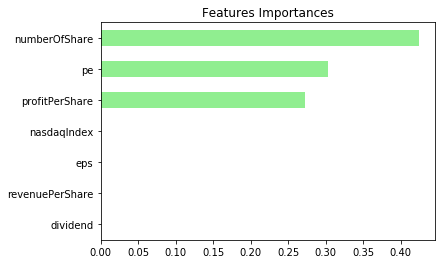

In [8]:
### To see what features contribute the most toward price determination
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)

# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()


As we can see from the above graph, the stock exchange index carries the most weight toward a stock's price determination. This index is followed by pe and eps in sequence of their respective significance as expected. Though dividend including all other features are shown to be not affecting the price, our literatue study indicates that they contribute greatly toward price determination. Here, since we only considered Apple Inc. data, and Apple Inc. had the same values for dividend and other features throughout the years, the graph is misleading here. As we add more data in our future work, we will see other features' contribution. 

In [9]:
# Things to consider: stocks will tend to be correlated with each other